In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

def invNormal(low, high, mu=0, sd=1, *, size=1, block_size=1024, bottleneck = 1):
    remain = size
    result = []
    
    mul = -0.5 * sd**-2

    while remain:
        # draw next block of uniform variates within interval
        x = np.random.uniform(low, high, size=min((remain+5)*2, block_size))
        x = np.round(x).astype(int)
        # reject proportional to normal density
        x = x[(1-bottleneck)*np.exp(mul*(x-mu)**2) < np.random.rand(*x.shape)]

        
        # make sure we don't add too much
        if remain < len(x):
            x = x[:remain]

        result.append(x)
        remain -= len(x)

    return np.concatenate(result)

def plot_value_occurrences(data_list):
  """
  Plots the occurrence of values in a list.

  Args:
      data_list: The list containing the data.
  """

  # Count the occurrences of each value
  value_counts = Counter(data_list)

  # Extract values and their counts for plotting
  values = list(value_counts.keys())
  counts = list(value_counts.values())

  #counts = [x / 50_000 for x in counts]
  plt.figure(figsize=(8,4))
  # Create the bar plot
  plt.bar(values, counts)
  #plt.hist(values, bins=200)

  # Add labels and title
  plt.xlabel("Timestep")
  plt.ylabel("Occurrences")

  # Show the plot
  plt.savefig("shape.pdf")
  plt.show()


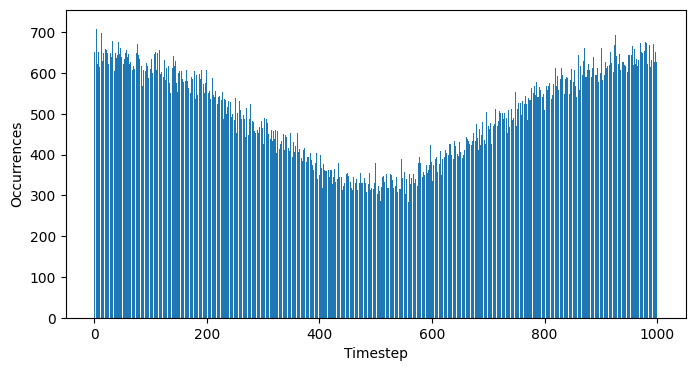

In [2]:
bottleneck_list = [0.5]

for item in bottleneck_list:
    t = 1000

    values = invNormal(low = 0,
                    high = t,
                    size = 5_000_00,
                    bottleneck = item,
                    mu = t/2,
                    sd = (t/5))
    
    plot_value_occurrences(values)
